In [141]:
import numpy as np
from scipy import signal

x=np.ones((10,5))
print(type(x[0,0]))

<class 'numpy.float64'>


In [56]:
x=np.ones((10,5))
x=x.astype(int)
print(type(x[0,0]))

<class 'numpy.int32'>


In [70]:
x=np.ones((10,5),dtype='int32')
print(type(x[0,0]))

<class 'numpy.int32'>


In [74]:
x=np.linspace(2,20,50)
print(x)

[ 2.          2.36734694  2.73469388  3.10204082  3.46938776  3.83673469
  4.20408163  4.57142857  4.93877551  5.30612245  5.67346939  6.04081633
  6.40816327  6.7755102   7.14285714  7.51020408  7.87755102  8.24489796
  8.6122449   8.97959184  9.34693878  9.71428571 10.08163265 10.44897959
 10.81632653 11.18367347 11.55102041 11.91836735 12.28571429 12.65306122
 13.02040816 13.3877551  13.75510204 14.12244898 14.48979592 14.85714286
 15.2244898  15.59183673 15.95918367 16.32653061 16.69387755 17.06122449
 17.42857143 17.79591837 18.16326531 18.53061224 18.89795918 19.26530612
 19.63265306 20.        ]


In [77]:
x=np.logspace(2,20,50,'log')
print(x)

[1.00000000e+02 2.32995181e+02 5.42867544e+02 1.26485522e+03
 2.94705170e+03 6.86648845e+03 1.59985872e+04 3.72759372e+04
 8.68511374e+04 2.02358965e+05 4.71486636e+05 1.09854114e+06
 2.55954792e+06 5.96362332e+06 1.38949549e+07 3.23745754e+07
 7.54312006e+07 1.75751062e+08 4.09491506e+08 9.54095476e+08
 2.22299648e+09 5.17947468e+09 1.20679264e+10 2.81176870e+10
 6.55128557e+10 1.52641797e+11 3.55648031e+11 8.28642773e+11
 1.93069773e+12 4.49843267e+12 1.04811313e+13 2.44205309e+13
 5.68986603e+13 1.32571137e+14 3.08884360e+14 7.19685673e+14
 1.67683294e+15 3.90693994e+15 9.10298178e+15 2.12095089e+16
 4.94171336e+16 1.15139540e+17 2.68269580e+17 6.25055193e+17
 1.45634848e+18 3.39322177e+18 7.90604321e+18 1.84206997e+19
 4.29193426e+19 1.00000000e+20]


In [101]:
t=np.linspace(0.0,1.0,1000,endpoint=False)
print(t[:50])

[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049]


In [164]:
wave=np.sin(2*np.pi*4*t)
noise=np.random.randint(-100,100,1000)/100
noisy_sin=wave+noise

0.9999210442038161


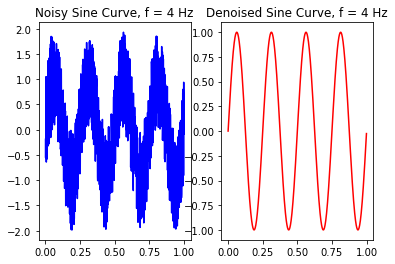

In [140]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,2)

ax[0].plot(t,noisy_sin,'blue')
ax[1].plot(t,wave,'red')

f=4

ax[0].set_title('Noisy Sine Curve, f = ' + str(f)  + ' Hz')
ax[1].set_title('Denoised Sine Curve, f = ' + str(f) + ' Hz')

plt.show()

In [179]:
b,a=signal.butter(2,10,btype='lowpass',analog=True)

In [180]:
w,h=signal.freqs(b,a)

Text(0.5, 1.0, 'Low Bandpass Filter Frequency Response')

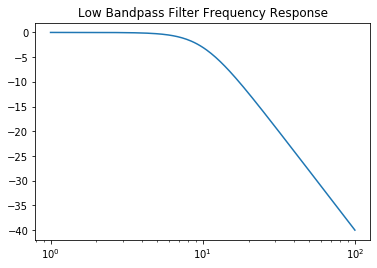

In [181]:
plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Low Bandpass Filter Frequency Response')

In [182]:
fs=1000 #sampling frequency
cutoff=10 #Hz, desired cutoff frequency
cf=cutoff/(fs/2) #adjusted cutoff frequency for creating a digital low bandpass filter

b2,a2=signal.butter(2,cf,btype='lowpass',analog=False)

In [183]:
filtered_signal=signal.filtfilt(b2,a2,noisy_sin)

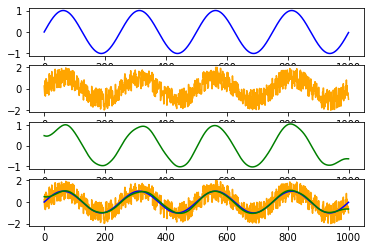

In [185]:
fig,ax=plt.subplots(4)

ax[0].plot(wave,'blue')
ax[1].plot(noisy_sin,'orange')
ax[2].plot(filtered_signal, 'green')
ax[3].plot(noisy_sin,'orange')
ax[3].plot(wave,'blue')
ax[3].plot(filtered_signal, 'green')